In [1]:
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
from HARK.Calibration.Income.IncomeTools import (
     sabelhaus_song_var_profile,
)
from sharkfin.expectations import *
from sharkfin.population import *
from sharkfin.markets import *
from sharkfin.simulation import *
import logging
import math
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def run_simulation(
    agent_parameters,
    dist_params,
    n_per_class,
    a=None,
    q=None,
    r= None,
    fm=None,
    market=None,
    dphm=1500,
    days_per_quarter=None
):
    #initialize population
    pop = AgentPopulation(agent_parameters, dist_params, n_per_class)
    
    market = MockMarket()
    
    #initialize the financial Fodel
    Fm = FinanceModel
    
    #initialize population model
    pop.init_simulation()
    
    attsim = AttentionSimulation(
        pop, Fm, a=a, q=q, r=r, market=market, dphm=dphm, days_per_quarter = days_per_quarter
    )
    attsim.simulate()
    
    return attsim, attsim.sim_stats()

In [3]:
dist_params = {
    'CRRA' : {'bot' : 2, 'top' : 10, 'n' : 2}, # Chosen for "interesting" results
    'DiscFac' : {'bot' : 0.936, 'top' : 0.978, 'n' : 2} # from CSTW "MPC" results
}

ssvp = sabelhaus_song_var_profile()

#assume all agents are 27
idx_40 = ssvp['Age'].index(40)

#parameters shared by all agents
agent_parameters = {
    'aNrmInitStd' : 0.0,
    'LivPrb' : [0.98 ** 0.25],
    'PermGroFac': [1.01 ** 0.25],
    'pLvlInitMean' : 1.0, # initial distribution of permanent income
    'pLvlInitStd' : 0.0,
    'Rfree' : 1.0,
    'TranShkStd' : [ssvp['TranShkStd'][idx_40] / 2],  # Adjust non-multiplicative shock to quarterly
    'PermShkStd' : [ssvp['PermShkStd'][idx_40] ** 0.25]
}

In [4]:
sim, sim_stats = run_simulation(
    agent_parameters,
    dist_params,
    10,
    a=0.2,
    q=4,
    #r = 10,
    days_per_quarter = 60,
    dphm=10500
)

/home/sb/.local/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sb/.local/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/sb/.local/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Q-0
run_market, buy_sell: (0, 0)
price: 101.41717903139886
run_market, buy_sell: (1, 0)
price: 101.25222654631997
run_market, buy_sell: (0, 13)
price: 100.46112081717946
run_market, buy_sell: (0, 0)
price: 100.74097322170194
run_market, buy_sell: (781, 0)
price: 101.34964362802948
run_market, buy_sell: (3, 0)
price: 101.35080235115613
run_market, buy_sell: (1, 0)
price: 99.43862505770619
run_market, buy_sell: (7, 0)
price: 98.32144826063254
run_market, buy_sell: (6, 0)
price: 99.86772946800572
run_market, buy_sell: (6, 0)
price: 101.41512867201132
run_market, buy_sell: (7, 6)
price: 100.9228647179785
run_market, buy_sell: (4, 0)
price: 101.14686125052336
run_market, buy_sell: (4, 0)
price: 101.45234909908571
run_market, buy_sell: (2, 0)
price: 103.01408676541476
run_market, buy_sell: (3, 0)
price: 101.84185641873611
run_market, buy_sell: (645, 49)
price: 101.86422995780553
run_market, buy_sell: (1, 0)
price: 101.6541722507294
run_market, buy_sell: (321, 0)
price: 100.66177004679358
run

run_market, buy_sell: (1771, 0)
price: 104.23394132034052
run_market, buy_sell: (366, 333)
price: 103.43532325124767
run_market, buy_sell: (461, 592)
price: 99.63580776331223
run_market, buy_sell: (28, 247)
price: 99.5051687578035
run_market, buy_sell: (949, 0)
price: 100.27760186691262
run_market, buy_sell: (237, 4)
price: 101.12697227478873
run_market, buy_sell: (4, 880)
price: 102.23367515304496
run_market, buy_sell: (33, 639)
price: 102.54576395534947
run_market, buy_sell: (852, 6)
price: 100.1641735201537
run_market, buy_sell: (83, 0)
price: 99.55174855275466
run_market, buy_sell: (34, 0)
price: 100.39178515759849
run_market, buy_sell: (0, 271)
price: 100.34829509573729
run_market, buy_sell: (1, 185)
price: 101.97930506427726
run_market, buy_sell: (1, 512)
price: 102.70707423677759
run_market, buy_sell: (143, 38)
price: 102.39592645367291
run_market, buy_sell: (7, 8)
price: 102.93886027732106
run_market, buy_sell: (315, 12)
price: 100.49657993525561
run_market, buy_sell: (10, 0)
p

In [5]:
data = sim.data()

In [6]:
data

,t,prices,buy,sell,buy_macro,sell_macro,owned,total_assets,mean_income,total_consumption,permshock_std,ror,expected_ror,expected_std
0,0,101.417179,0,0,0,0,5296.643278,537618.261816,28541.959199,0.000000,NaN,0.015017,0.001170,0.012063
1,1,101.252227,1,0,0,0,5283.794292,545263.735181,29343.698164,81082.258588,0.732477,-0.000794,0.001085,0.011837
2,2,100.461121,0,13,0,13,5284.457729,541525.572519,29343.698164,0.000000,0.732477,-0.006986,0.000761,0.011719
3,3,100.740973,0,0,0,0,5284.902855,543448.237171,29343.698164,0.000000,0.732477,0.003621,0.000873,0.011500
4,4,101.349644,781,0,0,0,6066.614154,547653.179992,29343.698164,0.000000,0.732477,0.006880,0.001112,0.011329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,105.149022,4,0,0,0,13799.750821,659424.156563,24425.168745,60008.256715,0.442335,0.029986,0.000465,0.014080
236,236,105.572390,10,483,0,478,13805.792484,666483.681936,24425.168745,0.000000,0.442335,0.004863,0.000790,0.013598
237,237,104.001160,8,3,0,0,13662.745281,644167.199034,24739.096392,28887.908087,0.491580,-0.014062,-0.000307,0.013651
238,238,105.338142,221,148,0,148,13440.334367,651884.256796,24702.619148,45083.340291,0.495066,0.013700,0.000728,0.013638


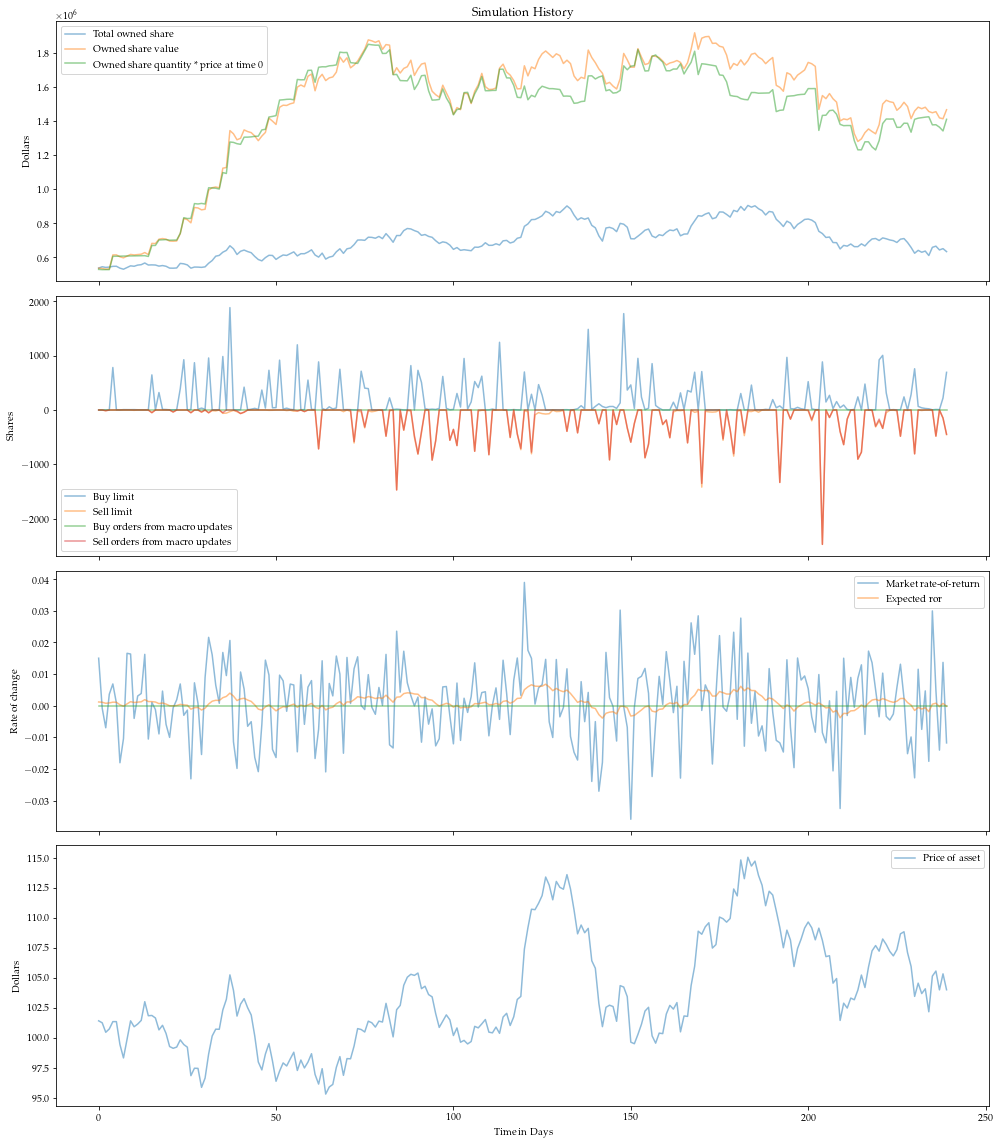

In [7]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(4,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(-data['sell'], alpha=0.5, label='Sell limit')
ax[1].plot(data['buy_macro'], alpha=0.5, label='Buy orders from macro updates')
ax[1].plot(-data['sell_macro'], alpha=0.5, label='Sell orders from macro updates')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run.png")
plt.show()



In [8]:
sim.days_per_quarter

60

In [9]:
sim.market.prices

[100,
 101.41717903139886,
 101.25222654631997,
 100.46112081717946,
 100.74097322170194,
 101.34964362802948,
 101.35080235115613,
 99.43862505770619,
 98.32144826063254,
 99.86772946800572,
 101.41512867201132,
 100.9228647179785,
 101.14686125052336,
 101.45234909908571,
 103.01408676541476,
 101.84185641873611,
 101.86422995780553,
 101.6541722507294,
 100.66177004679358,
 101.04272437667707,
 100.36092432482126,
 99.27174253118964,
 99.12380388174863,
 99.22724569527392,
 99.82581182053076,
 99.43880248288177,
 99.21706686378151,
 96.84038702261103,
 97.4603120680541,
 97.44908059182136,
 95.86357599574949,
 96.63908468316427,
 98.646116468255,
 100.15076243005339,
 100.7197005933692,
 100.7117558687197,
 102.32238291269286,
 103.21042227622885,
 105.25176915747971,
 103.9606492560043,
 101.81302111760861,
 102.81207720255856,
 103.26704058799154,
 102.50862772028603,
 101.90556620238078,
 100.1542805812592,
 97.98255752157625,
 97.31988944536388,
 98.64068473010818,
 99.516985685

In [10]:
sim.market.dividends

[0.08333333333333333,
 0.08451431585949905,
 0.08437685545526664,
 0.08371760068098288,
 0.08395081101808495,
 0.08445803635669123,
 0.08445900195929677,
 0.08286552088142182,
 0.08193454021719378,
 0.08322310789000477,
 0.0845126072266761,
 0.08410238726498208,
 0.0842890510421028,
 0.08454362424923809,
 0.0858450723045123,
 0.08486821368228009,
 0.08488685829817127,
 0.08471181020894117,
 0.08388480837232798,
 0.08420227031389756,
 0.08363410360401771,
 0.08272645210932471,
 0.08260316990145719,
 0.08268937141272827,
 0.08318817651710897,
 0.08286566873573481,
 0.08268088905315125,
 0.08070032251884252,
 0.08121692672337841,
 0.08120756715985113,
 0.07988631332979124,
 0.08053257056930356,
 0.08220509705687917,
 0.08345896869171116,
 0.08393308382780766,
 0.08392646322393309,
 0.08526865242724405,
 0.08600868523019072,
 0.0877098076312331,
 0.08663387438000358,
 0.08484418426467384,
 0.08567673100213213,
 0.08605586715665962,
 0.08542385643357168,
 0.08492130516865065,
 0.08346190048

In [11]:
[sim.market.prices[i] / sim.market.dividends[i] for i in range(1, len(sim.market.prices))]

[1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 

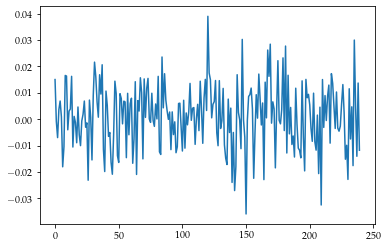

In [12]:
plt.plot(sim.market.ror_list())

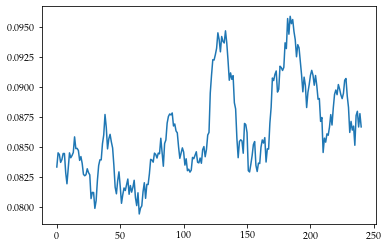

In [13]:
plt.plot(sim.market.dividends)

In [14]:
sim.market.next_dividend()

0.08698485790603769

In [15]:
sim.market.dividends[-1]

0.08667586027151579

In [16]:
mean([sim.market.next_dividend() / sim.market.dividends[-1] for i in range(1000000)

SyntaxError: unexpected EOF while parsing (1036260296.py, line 1)